# Foreground - Background Color Generation for MNIST

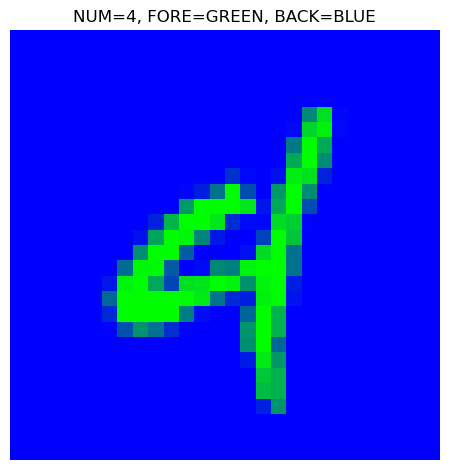

In [77]:
import torch
from torchvision import datasets, transforms
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

np.random.seed(42)  # 난수 생성기의 초기값 설정 (재현성 보장)

# MNIST 데이터셋을 로드합니다.
transform = transforms.Compose([transforms.ToTensor()])
mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# 무지개 색상 팔레트를 정의합니다 (7가지 색상).
RAINBOW_COLORS = [
    (255, 0, 0),    # 빨강
    (255, 127, 0),  # 주황
    (255, 255, 0),  # 노랑
    (0, 255, 0),    # 초록
    (0, 0, 255),    # 파랑
    (75, 0, 130),   # 남색 (인디고)
    (148, 0, 211)   # 보라
]

RAINBOW_NAMES = [
    'RED',
    'ORANGE',
    'YELLOW',
    'GREEN',
    'BLUE',
    'INDIGO',
    'VIOLET'
]

def get_random_rainbow_color():
    """무지개 팔레트에서 임의의 색상을 선택합니다."""
    # return tuple(np.random.randint(0, 256, size=3))
    idx = np.random.randint(0, len(RAINBOW_COLORS))
    return RAINBOW_COLORS[idx], RAINBOW_NAMES[idx]

def colorize_digit(digit_image, fg_color, bg_color):
    """숫자 이미지에 전경(fg)과 배경(bg) 색상을 적용합니다."""
    digit = digit_image.convert('L')  # 이미지를 그레이스케일로 변환합니다.
    colored_digit = ImageOps.colorize(digit, black=bg_color, white=fg_color).convert('RGBA')
    return colored_digit

def overlay_digit_on_background(colored_digit):
    """투명도를 제거하고 일관된 배경 이미지를 생성합니다."""
    final_image = colored_digit.convert('RGB')  # 투명도를 제거합니다.
    return final_image

# 전경과 배경 색상이 있는 MNIST 데이터셋을 생성하고 표시합니다.
idx = np.random.randint(0, len(mnist))  # 0~9 사이의 숫자
image, label = mnist[idx]
pil_image = transforms.ToPILImage()(image)

# 전경과 배경 색상을 무작위로 선택합니다.
fg_color, fg_label = get_random_rainbow_color()
bg_color, bg_label = get_random_rainbow_color()

# 전경과 배경 색상이 같지 않도록 보장합니다.
while bg_color == fg_color:
  bg_color, bg_label = get_random_rainbow_color()

# 선택된 색상으로 숫자 이미지를 색칠합니다.
colored_digit = colorize_digit(pil_image, fg_color, bg_color)

if image is not None:
  # 최종 이미지를 표시합니다.
  final_image = overlay_digit_on_background(colored_digit)
  plt.imshow(final_image)
  plt.axis('off')  # 축을 비활성화합니다.
  plt.title(f'NUM={label}, FORE={fg_label}, BACK={bg_label}')

  # 레이아웃을 조정하고 화면에 표시합니다.
  plt.tight_layout()
  plt.show()

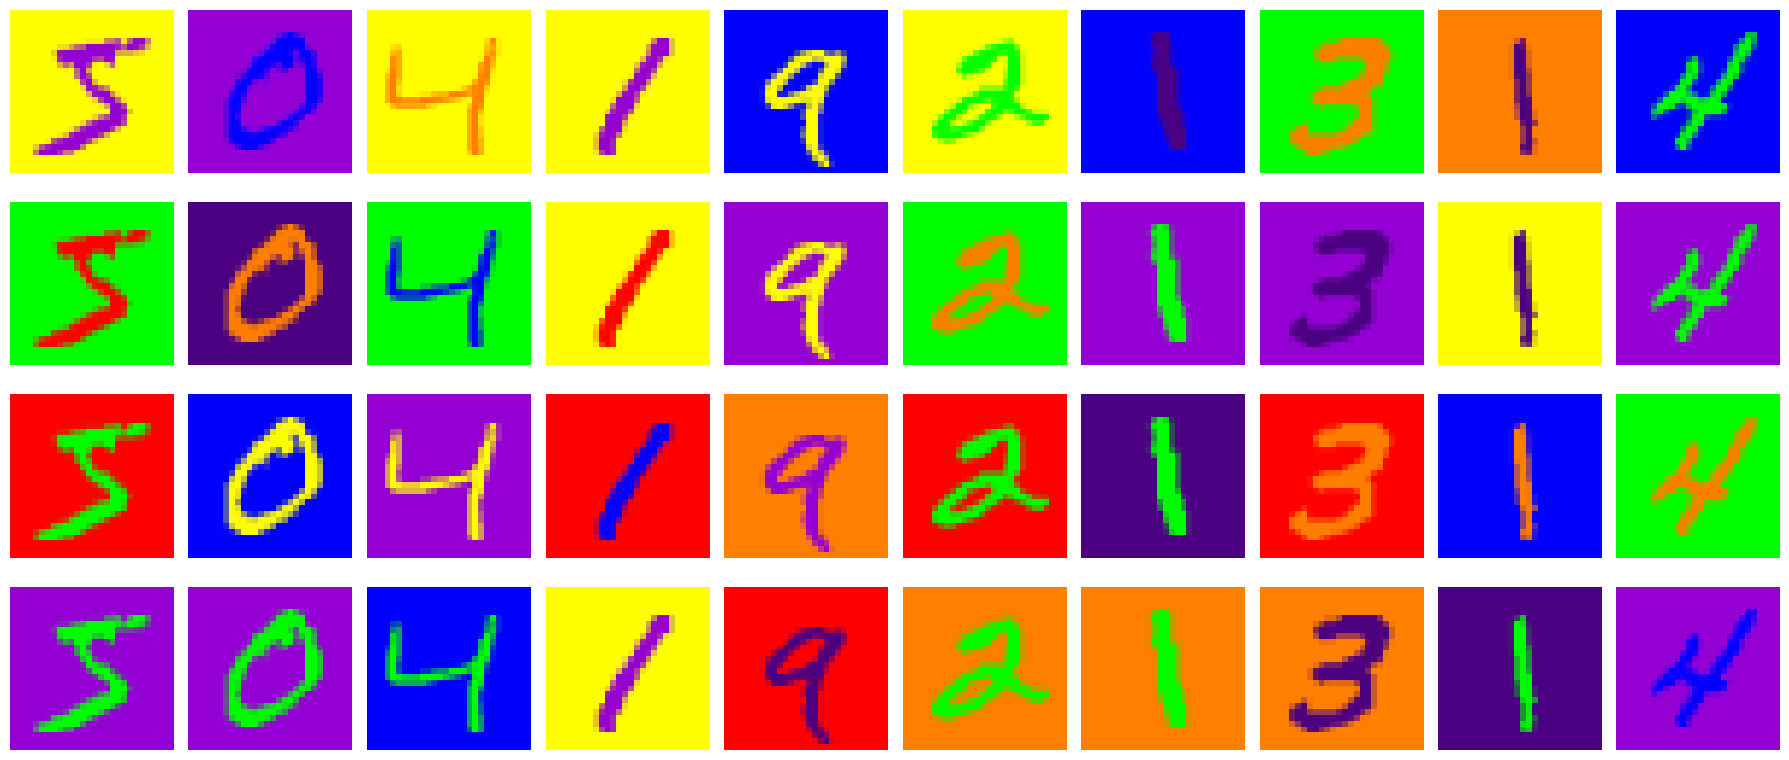

In [8]:
import torch
from torchvision import datasets, transforms
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt

# MNIST 데이터셋을 로드합니다.
transform = transforms.Compose([transforms.ToTensor()])
mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# 무지개 색상 팔레트를 정의합니다 (7가지 색상).
RAINBOW_COLORS = [
    (255, 0, 0),    # 빨강
    (255, 127, 0),  # 주황
    (255, 255, 0),  # 노랑
    (0, 255, 0),    # 초록
    (0, 0, 255),    # 파랑
    (75, 0, 130),   # 남색 (인디고)
    (148, 0, 211)   # 보라
]

def get_random_rainbow_color():
    """무지개 팔레트에서 임의의 색상을 선택합니다."""
    return RAINBOW_COLORS[np.random.randint(0, len(RAINBOW_COLORS))]

def colorize_digit(digit_image, fg_color, bg_color):
    """숫자 이미지에 전경(fg)과 배경(bg) 색상을 적용합니다."""
    digit = digit_image.convert('L')  # 이미지를 그레이스케일로 변환합니다.
    colored_digit = ImageOps.colorize(digit, black=bg_color, white=fg_color).convert('RGBA')
    return colored_digit

def overlay_digit_on_background(colored_digit):
    """투명도를 제거하고 일관된 배경 이미지를 생성합니다."""
    final_image = colored_digit.convert('RGB')  # 투명도를 제거합니다.
    return final_image

# 전경과 배경 색상이 있는 MNIST 데이터셋을 생성하고 표시합니다.
fig, axes = plt.subplots(4, 10, figsize=(18, 8))  # 4개의 도메인(행)을 생성합니다.

for row in range(4):  # 4개의 도메인(행)에 대해 반복합니다.
    for col in range(10):  # 0부터 9까지의 숫자를 표시합니다.
        image, label = mnist[col]
        pil_image = transforms.ToPILImage()(image)

        # 전경과 배경 색상을 무작위로 선택합니다.
        fg_color = get_random_rainbow_color()
        bg_color = get_random_rainbow_color()

        # 전경과 배경 색상이 같지 않도록 보장합니다.
        while bg_color == fg_color:
            bg_color = get_random_rainbow_color()

        # 선택된 색상으로 숫자 이미지를 색칠합니다.
        colored_digit = colorize_digit(pil_image, fg_color, bg_color)

        # 최종 이미지를 표시합니다.
        final_image = overlay_digit_on_background(colored_digit)
        axes[row, col].imshow(final_image)
        # axes[row, col].imshow(image[0], cmap='gray')
        axes[row, col].axis('off')  # 축을 비활성화합니다.

# 레이아웃을 조정하고 화면에 표시합니다.
plt.tight_layout()
plt.show()


In [10]:
# final_image를 NumPy 배열로 변환
image_array = np.array(final_image)

# 배열의 크기와 데이터 유형을 확인
print("Array shape:", image_array.shape)  # 예: (28, 28, 3)
print("Data type:", image_array.dtype)

# 일부 픽셀 값 확인 (예: 왼쪽 상단 5x5 픽셀)
print("Top-left 5x5 pixels (RGB):")
print(image_array[7:9, :])

Array shape: (28, 28, 3)
Data type: uint8
Top-left 5x5 pixels (RGB):
[[[  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0 121 134]
  [  0 254   1]
  [  0 169  86]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]]

 [[  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0 169  86]
  [  0 254   1]
  [  0 140 115]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]]]


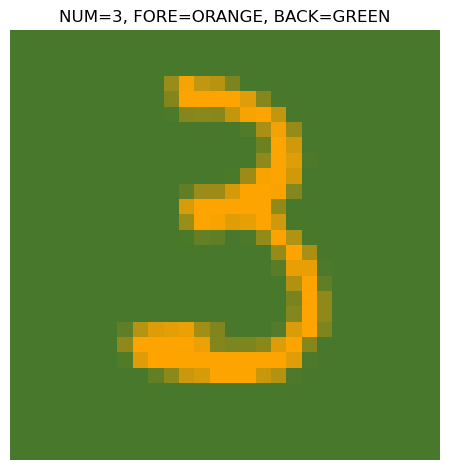

In [72]:
import torch
from torchvision import datasets, transforms
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt

#np.random.seed(42)  # 난수 생성기의 초기값 설정 (재현성 보장)

# MNIST test set을 로드합니다.
transform = transforms.Compose([transforms.ToTensor()])
test_mnist = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# 무지개 색상 팔레트를 정의합니다 (7가지 색상).

RAINBOW_NAMES = [
    'RED',
    'ORANGE',
    'YELLOW',
    'GREEN',
    'BLUE',
    'INDIGO',
    'VIOLET'
]

RAINBOW_COLORS = {
        'RED': [(255, 48, 39), (255, 80, 90)],
        'ORANGE': [(255, 165, 0), (238, 125, 40)],
        'YELLOW': [(218, 181, 44), (236, 231, 55)],
        'GREEN': [(71, 120, 44), (136, 181, 44)],
        'BLUE': [(64, 56, 200), (70, 132, 239)],
        'INDIGO': [(75, 12, 133), (75, 45, 130)],
        'VIOLET': [(132, 16, 115), (106, 16, 115)]
    }

def get_random_rainbow_color():
    """무지개 팔레트에서 임의의 색상을 선택합니다."""
    # 색상 이름과 RGB 값을 딕셔너리로 매핑합니다.


    # 무작위로 색상 이름을 선택합니다.
    fg_label = np.random.choice(RAINBOW_NAMES)
    
    # 선택된 색상 이름에 해당하는 RGB 값을 무작위로 선택합니다.
    fg_color = RAINBOW_COLORS[fg_label][np.random.randint(len(RAINBOW_COLORS[fg_label]))]
    
    return fg_color, fg_label

def colorize_digit(digit_image, fg_color, bg_color):
    """숫자 이미지에 전경(fg)과 배경(bg) 색상을 적용합니다."""
    digit = digit_image.convert('L')  # 이미지를 그레이스케일로 변환합니다.
    colored_digit = ImageOps.colorize(digit, black=bg_color, white=fg_color).convert('RGBA')
    return colored_digit

def overlay_digit_on_background(colored_digit):
    """투명도를 제거하고 일관된 배경 이미지를 생성합니다."""
    final_image = colored_digit.convert('RGB')  # 투명도를 제거합니다.
    return final_image

# 테스트셋에서 이미지를 선택하고 색상 적용
idx = np.random.randint(0, len(test_mnist))  # 0~9 사이의 숫자
image, label = test_mnist[idx]
pil_image = transforms.ToPILImage()(image)

# 전경과 배경 색상을 무작위로 선택합니다.
fg_color, fg_label = get_random_rainbow_color()

bg_color, bg_label = get_random_rainbow_color()


# 전경과 배경 색상이 같지 않도록 보장합니다.
while bg_label == fg_label:
  bg_color, bg_label = get_random_rainbow_color()

# 선택된 색상으로 숫자 이미지를 색칠합니다.
colored_digit = colorize_digit(pil_image, fg_color, bg_color)

if image is not None:
  # 최종 이미지를 표시합니다.
  final_image = overlay_digit_on_background(colored_digit)
  plt.imshow(final_image)
  plt.axis('off')  # 축을 비활성화합니다.
  plt.title(f'NUM={label}, FORE={fg_label}, BACK={bg_label}')

  # 레이아웃을 조정하고 화면에 표시합니다.
  plt.tight_layout()
  plt.show()


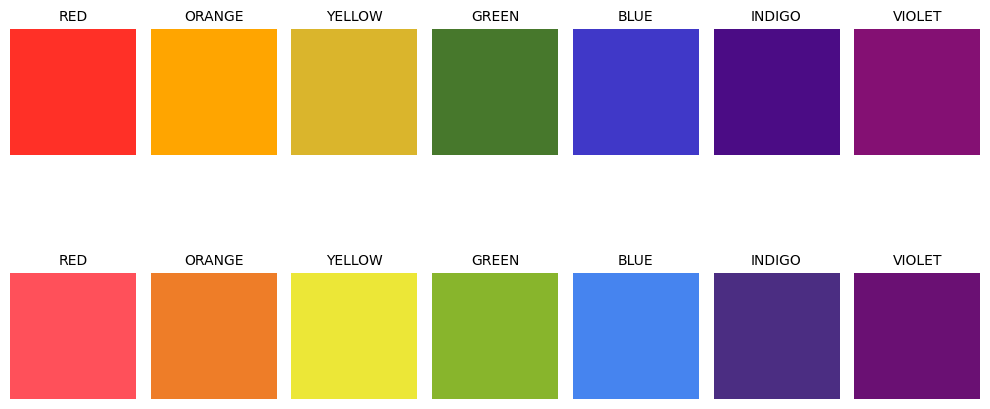

In [73]:
fig, axes = plt.subplots(2, 7, figsize=(10, 6))

for row in range(2):  # 2개의 행에 대해 반복
    for col in range(7):  # 7개의 색상에 대해 반복
        fg_label = RAINBOW_NAMES[col]  # 색상 이름

        fg_color = RAINBOW_COLORS[fg_label][row]  # 색상 팔레트에서 해당 색상 선택

        # 빈 이미지를 만들어 색칠
        blank_image = Image.new("RGB", (28, 28), color=fg_color)
        axes[row, col].imshow(blank_image)
        axes[row, col].axis('off')  # 축을 비활성화합니다.

        # 타이틀에 색상 이름을 추가합니다.
        axes[row, col].set_title(f'{fg_label}', fontsize=10)

plt.tight_layout()
plt.show()

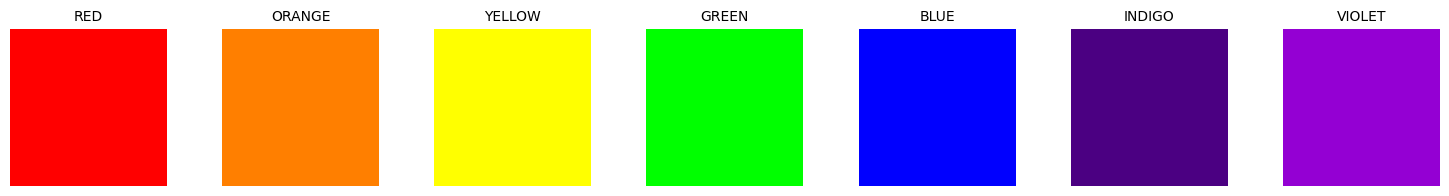

In [63]:
#기존팔레트
import matplotlib.pyplot as plt
from PIL import Image

# 기존 팔레트 정의
RAINBOW_COLORS = [
    (255, 0, 0),    # 빨강
    (255, 127, 0),  # 주황
    (255, 255, 0),  # 노랑
    (0, 255, 0),    # 초록
    (0, 0, 255),    # 파랑
    (75, 0, 130),   # 남색 (인디고)
    (148, 0, 211)   # 보라
]

RAINBOW_NAMES = [
    'RED', 'ORANGE', 'YELLOW', 'GREEN', 'BLUE', 'INDIGO', 'VIOLET'
]

# 1x7 그리드로 색상 표시
fig, axes = plt.subplots(1, 7, figsize=(15, 2))

for col in range(7):  # 0부터 6까지 반복
    fg_color = RAINBOW_COLORS[col]  # 팔레트에서 해당 색상 선택
    fg_label = RAINBOW_NAMES[col]  # 색상 이름

    # 빈 이미지를 만들어 색칠
    blank_image = Image.new("RGB", (28, 28), color=fg_color)
    
    axes[col].imshow(blank_image)
    axes[col].axis('off')  # 축을 비활성화합니다.

    # 타이틀에 색상 이름을 추가합니다.
    axes[col].set_title(f'{fg_label}', fontsize=10)

plt.tight_layout()
plt.show()


In [78]:
x = []

# MNIST 데이터셋의 모든 이미지를 색칠합니다.
for idx in range(len(mnist)):
    image, label = mnist[idx]
    pil_image = transforms.ToPILImage()(image)

    # 전경과 배경 색상을 무작위로 선택합니다.
    fg_color, fg_label = get_random_rainbow_color()
    bg_color, bg_label = get_random_rainbow_color()

    # 전경과 배경 색상이 같지 않도록 보장합니다.
    while bg_color == fg_color:
        bg_color, bg_label = get_random_rainbow_color()

    # 선택된 색상으로 숫자 이미지를 색칠합니다.
    colored_digit = colorize_digit(pil_image, fg_color, bg_color)

    # 최종 이미지를 생성하여 x에 추가합니다.
    final_image = overlay_digit_on_background(colored_digit)
    x.append(transforms.ToTensor()(final_image))  # 이미지 텐서로 변환하여 x에 추가

# x에 색상 입혀진 이미지들이 저장되었습니다.
x = torch.stack(x)  # 리스트를 텐서로 변환

In [80]:
print(x.shape)

torch.Size([60000, 3, 28, 28])
